## Как аналитик развлекательного приложения Procrastinate Pro+, пытаемся выяснить, почему, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.


In [73]:
    import pandas as pd
    from matplotlib import pyplot as plt
    import seaborn as sns
    %matplotlib inline
    import datetime
    from datetime import datetime
    from datetime import timedelta
    import plotly.express as px
    from time import time
    import numpy as np
    import plotly.express as px
    #%pylab inline   
    

In [74]:
pd.set_option('max_rows', 5)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
try:
    from pandas_profiling import ProfileReport
except:
    !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
    from pandas_profiling import ProfileReport

     |████████████████████████████████| 21.8 MB 165 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 102 kB 1.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 709 kB 4.4 MB/s            
     |████████████████████████████████| 4.7 MB 45.4 MB/s            
     |████████████████████████████████| 2.0 MB 64.8 MB/s            
     |████████████████████████████████| 812 kB 68.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.9 MB 80.2 MB/s            
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262600 sha256=2bed311863edef42ffda0b422d2aa832bc1e0fc9f4a36b9a84c20b3a62f83514
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ys399c2/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0a8152d

#### Шаг 1. Загрузим данные и подготовим их к анализу

In [75]:
try:
    sessions = pd.read_csv('/Users/ulia/Downloads/visits_info_short.csv')
    orders = pd.read_csv('/Users/ulia/Downloads/orders_info_short.csv')
    costs = pd.read_csv('/Users/ulia/Downloads/costs_info_short.csv')

except:
    sessions = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')


In [76]:
print(sessions.head())
print()
print('#'*50)
print('Orders')
print()
print(orders.head())
print('#'*50)
print('Costs')
print()
print(costs.head())

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  

##################################################
Orders

        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
##################################################
Costs

           dt   C

In [77]:
sessions = sessions.rename(columns={'User Id':'user_id', 'Session Start':'session_start','Session End':'session_end'})
sessions.columns = sessions.columns.str.lower()
sessions.head()

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [78]:
sessions['session_start'] = pd.to_datetime(sessions['session_start']).dt.date


In [79]:
orders = orders.rename(columns={'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'})
orders.head ()

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [80]:
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date

In [81]:
costs.columns =costs.columns.str.lower()
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

In [82]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [14]:
ProfileReport(sessions)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
ProfileReport(orders)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
ProfileReport(costs)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

#### get_profiles()

In [83]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders,ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
    profiles['month'] = pd.to_datetime(profiles['first_ts']).astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [84]:
profiles = get_profiles(sessions,orders,costs)

#### get_retention()

In [85]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    #добваляем payer в dimensions:
    dimensions = ['payer'] + dimensions

    #исключаем пользователей, не "доживших" до горизонта анализа:
    last_suitable_aquisition_date = observation_date 
    if not ignore_horizon:
        last_suitable_aquisition_date = observation_date - timedelta(horizon_days - 1)

    result_raw = profiles.query('dt <= @last_suitable_aquisition_date')

    # собираем «сырые» данные для расчёта удержания

    #объединяем профили с сессиями
    result_raw = result_raw.merge(sessions[['user_id','session_start']], on='user_id', how='left')
    #определяем лайфтайм для каждой сессии
    result_raw['lifetime'] = (result_raw['session_start']- result_raw['first_ts']).dt.days


    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df,dims,horizon_days):
        result = df.pivot_table( 
            index=dims,
            columns='lifetime',
            values='user_id',
            aggfunc='nunique'
        )

        #считаем когорты
        cohort_sizes = (
            df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'})
        )

        #объединяем таблицу result c когортами
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        #делим все значения в строках на размеры когорт
        result = result.div(result['cohort_size'], axis=0)
        #ограничиваем анализ горизонтом:
        result = result[['cohort_size'] + list(range(horizon_days))]
        #восстанавливаем столбец cohort_size
        result['cohort_size'] = cohort_sizes
        return result


    #получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw,dimensions,horizon_days)

    #получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time






In [86]:
result_raw, retention, retention_in_time = get_retention(profiles,sessions,datetime(2019, 10, 1).date(), 7)

#### get_conversion()

In [87]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id','event_dt'])
        .groupby('user_id')
        .agg({'event_dt':'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили

    result_raw = result_raw.merge(first_purchases[['user_id','event_dt']], on='user_id', how='left')


    #расчитываем lifetime для каждой покупки

    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    #Если в dimensions ничего нет - гурппируем по 'All users'
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']


    #функция по группировки по dimensions:

    def group_by_dimensions(df,dims,horizon_days):
        result = df.pivot_table(index=dims,columns='lifetime',values='user_id',aggfunc='nunique')
        result = result.fillna(0).cumsum(axis=1)

        #считаем размеры когорт
        cohort_sizes = df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'})

        #объединяем таблицу конверсии с размерами когорт
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #делим каждую ячейку с количеством суммарных покупателей на размер когорты, получаем conversion_rate
        result = result.div(result['cohort_size'],axis=0)
        #корректируем на горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        #восстанавливаем столбец cohort_size
        result['cohort_size'] = cohort_sizes
        return result

    #получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw,dimensions,horizon_days)
    #получаем таблицу истории конверсии
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

In [88]:
conversions_raw, conversion, conversion_history = get_conversion(profiles,orders,datetime(2019, 10, 1).date(), 7)

#### get_ltv() расчет ltv и roi

In [89]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
        # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    #добваляем данные о покупках в профили
    result_raw = result_raw.merge(purchases[['user_id','event_dt','revenue']], on='user_id', how='left')
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    #группируем по cohort, если  в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    #функция группировки по dimensions
    def group_by_dimensions(df, dims, horizon_days):
        result = (
            df.pivot_table(
                index=dims,
                columns='lifetime',
                values='revenue',
                aggfunc='sum'
            )
        )

        #находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        #вычисляем размеры когорт
        cohort_sizes = df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'})

        #объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        #считаем LTV, делим выручку на cohort_size

        result = result.div(result['cohort_size'], axis=0)

        #корректируем lifetime

        result = result[['cohort_size'] + list(range(horizon_days))]
        
        #восстанавливаем столбец cohort_size
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions

        cac = df[['user_id','acquisition_cost'] + dims].drop_duplicates()

         # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost':'mean'})
            .rename(columns={'acquisition_cost':'cac'})
        )

         # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        # удаляем строки с бесконечным ROI
        
        roi = roi[~roi['cohort_size'].isin([np.inf])]
       
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = result['cohort_size']
        
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


In [90]:
roi_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,orders,datetime(2019, 10, 1).date(), 7)

#### filter_data()

In [91]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### функция для визуализации retention


In [92]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### функция для визуализации конверсии

In [93]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### функция для визуализации LTV и ROI

In [94]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Шаг 3. Проведем исследовательский анализ данных

In [95]:
profiles = get_profiles(sessions,orders,costs)

In [96]:
profiles.head()

user_id    first_ts     channel  device         region          dt  \
0    599326  2019-05-07    FaceBoom     Mac  United States  2019-05-07   
1   4919697  2019-07-09    FaceBoom  iPhone  United States  2019-07-09   
2   6085896  2019-10-01     organic  iPhone         France  2019-10-01   
3  22593348  2019-08-22  AdNonSense      PC        Germany  2019-08-22   
4  31989216  2019-10-02     YRabbit  iPhone  United States  2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True              1.09  
1 2019-07-01  False              1.11  
2 2019-10-01  False              0.00  
3 2019-08-01  False              0.99  
4 2019-10-01  False              0.23

In [97]:
(profiles['first_ts'].min(), profiles['first_ts'].max())

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Минимальная дата привлечения пользователей  - 1 мая 2019 года, максимальная - 27 октября 2019 года

<div class="alert alert-info">
    Указанный временной интервал соответсвует заявленному в проекте
</div>

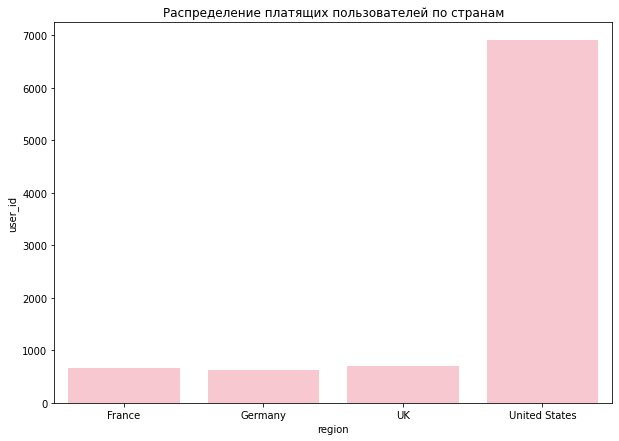

In [98]:
plt.figure(figsize=(10,7))
sns.barplot(x='region', y='user_id', color='pink', data=profiles.query('payer==True').groupby('region').agg({'user_id':'nunique'}).reset_index())
plt.title('Распределение платящих пользователей по странам')
plt.show()




In [99]:
profiles.groupby('region').agg({'user_id':'count','payer':'mean'}).sort_values(by=['user_id','payer'], ascending=False).rename(columns={'user_id': 'users','payer':'payer_ratio'}).reset_index()

region   users  payer_ratio
0  United States  100002         0.07
1             UK   17575         0.04
2         France   17450         0.04
3        Germany   14981         0.04

Наибольшая доля платящих пользователей - в США

Больше всего платящих пользователей - из Соединенных Штатов, остальные регионы представлены примерно поровну

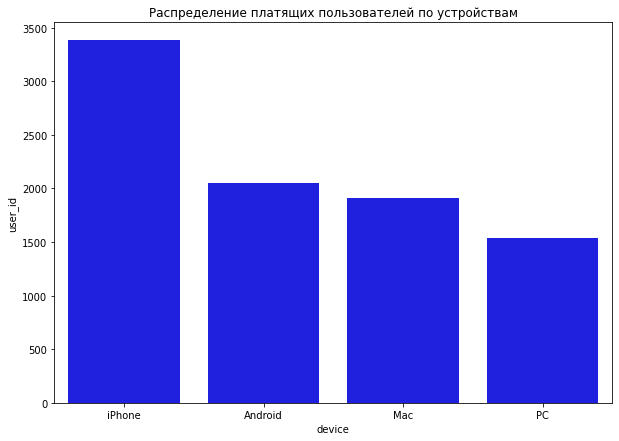

In [101]:
plt.figure(figsize=(10,7))
sns.barplot(x='device', y='user_id', color='blue',data=profiles.query('payer==True').groupby('device')\
    .agg({'user_id':'nunique'}).sort_values(by='user_id',ascending=False).reset_index())
plt.title('Распределение платящих пользователей по устройствам')
plt.show()


In [102]:
profiles.groupby('device').agg({'user_id':'count','payer':'mean'}).sort_values(by=['user_id','payer'], ascending=False).rename(columns={'user_id': 'users','payer':'payer_ratio'}).reset_index()

device  users  payer_ratio
0   iPhone  54479         0.06
1  Android  35032         0.06
2       PC  30455         0.05
3      Mac  30042         0.06

Наибольшая доля платящих пользователей - у владельцев Iphone, но и Android не особенно отстает

Среди клиентов магазина больше всего владельцев Iphone, на втором месте с большим отрывом Android

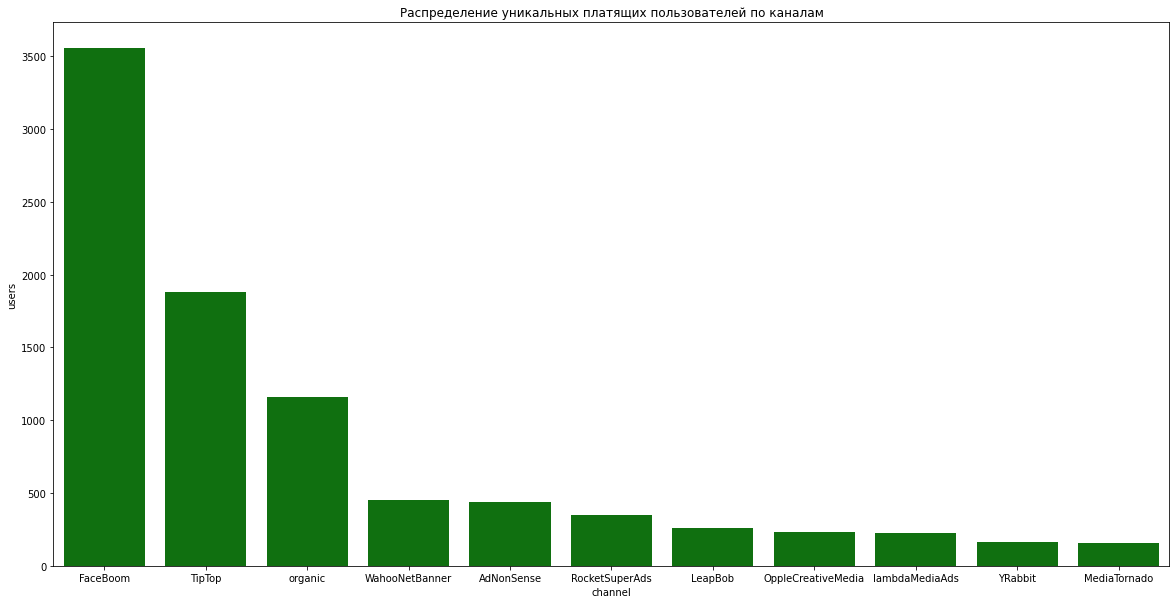

In [103]:
plt.figure(figsize=(20,10))
sns.barplot(x='channel', y='users', color='green', data=profiles.query('payer==True').groupby('channel')\
    .agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False).rename(columns={'user_id':'users'}).reset_index())
plt.title('Распределение уникальных платящих пользователей по каналам')
plt.show()


Больше всего платящих пользователей пришло из каналов FaceBoom, TipTop и органики, что интересно, так как это канал бесплатный

In [104]:
profiles.groupby('channel').agg({'user_id':'count','payer':'mean'}).sort_values(by=['user_id','payer'], ascending=False).rename(columns={'user_id': 'users','payer':'payer_ratio'}).reset_index()

channel  users  payer_ratio
0          organic  56439         0.02
1         FaceBoom  29144         0.12
..             ...    ...          ...
9       AdNonSense   3880         0.11
10  lambdaMediaAds   2149         0.10

[11 rows x 3 columns]

Самый высокий процент платящих пользователей - у самых малочисленных каналов привлечения - AdNonSense и lambdaMediaAds - больше 10%
Самая низкая доля платящих - пришла из Органики и OppleCreativeMedia

#### Шаг 4. Маркетинг

In [33]:
round(costs['costs'].sum(),2)

105497.3

Всего на рекламу было потрачено более 105 тыс

In [47]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

dt   channel  costs      month
0  2019-05-01  FaceBoom  113.3 2019-05-01
1  2019-05-02  FaceBoom   78.1 2019-05-01
2  2019-05-03  FaceBoom   85.8 2019-05-01
3  2019-05-04  FaceBoom  136.4 2019-05-01
4  2019-05-05  FaceBoom  122.1 2019-05-01

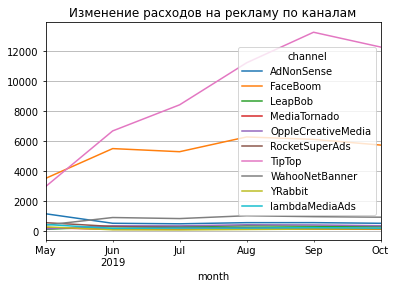

In [48]:
costs.query('~ (channel == "organic")').pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True)
plt.title('Изменение расходов на рекламу по каналам')
plt.show()

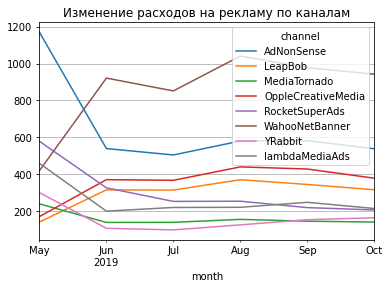

In [49]:
costs.query('~ (channel.isin(["organic","TipTop","FaceBoom"]))').pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True)
plt.title('Изменение расходов на рекламу по каналам')
plt.show()

Видим, что за исключением затрат на канал WahooNetBanner, затраты на который росли, затраты на остальные каналы из общей группы были стабильны

Самые большие затраты на рекламу были по каналам Tiptop и Faceboom, при этом расходы на Tiptop до сентября резко росли, расходы на остальные платные каналы были были стабильными и мало отличались по каналам

In [36]:
profiles[profiles['channel']!='organic'].groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

In [37]:
round(profiles[profiles['channel']!='organic']['acquisition_cost'].mean(),2)

1.13

В среднем платные пользователи обходятся в 1.13 доллара

In [38]:
profiles[profiles['channel']!='organic'].groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)\
    .reset_index()

channel  acquisition_cost
0              TipTop          2.799003
1            FaceBoom          1.113286
2          AdNonSense          1.008054
3      lambdaMediaAds          0.724802
4      WahooNetBanner          0.602245
5      RocketSuperAds          0.412095
6  OppleCreativeMedia          0.250000
7             YRabbit          0.218975
8        MediaTornado          0.218717
9             LeapBob          0.210172

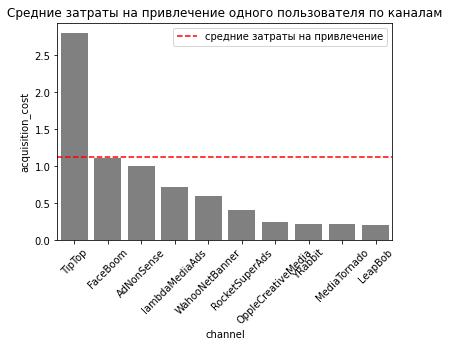

In [50]:
sns.barplot(data=profiles[profiles['channel']!='organic'].groupby('channel').agg({'acquisition_cost':'mean'})\
    .sort_values(by='acquisition_cost', ascending=False).reset_index()
    , color='grey',x='channel', y='acquisition_cost')
plt.axhline(y=profiles[profiles['channel']!='organic']['acquisition_cost'].mean(), color='red', linestyle='--', label='средние затраты на привлечение')
plt.xticks(rotation=45)
plt.legend()
plt.title('Средние затраты на привлечение одного пользователя по каналам')
plt.show()

Самые дорогие по привлечению пользователи - из каналов TipTop и Faceboom 
Расходы на TipTop вдвое превышают средние показатели
Затраты на TipTop и Faceboom и в абсолютном выражении самые большие

#### Шаг 4. Окупаемость рекламы

##### 4.1 Общая окупаемость рекламы

In [51]:
roi_raw, ltv, ltv_history, roi, roi_history  = get_ltv(profiles.query('~(channel=="organic")'),orders,datetime(2019, 11, 1).date(), 14)

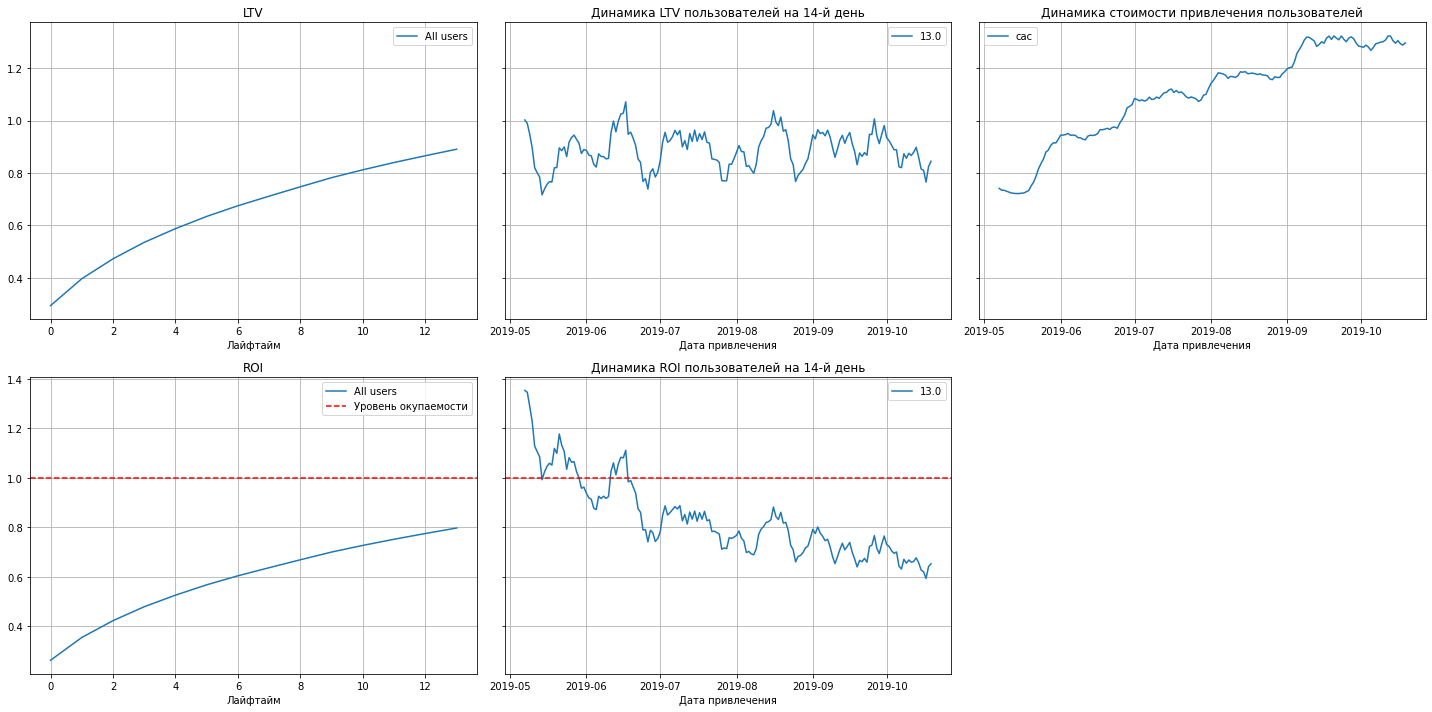

In [52]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

По графикам LTV увеличивается для всех когорт, ROI к 14 дню не достигает уровня окупаемости, а вот расходы на рекламу уверенно растут, причем так, что ROI для привлеченных после июня ниже уровня окупаемости.

##### 4.2 Окупаемость рекламы с разбивкой по рекламным каналам

In [54]:
dimensions = ['channel']
roi_raw, ltv, ltv_history, roi, roi_history  = get_ltv(profiles.query('~(channel=="organic")'),orders,datetime(2019, 11, 1).date(), 14, dimensions=dimensions )

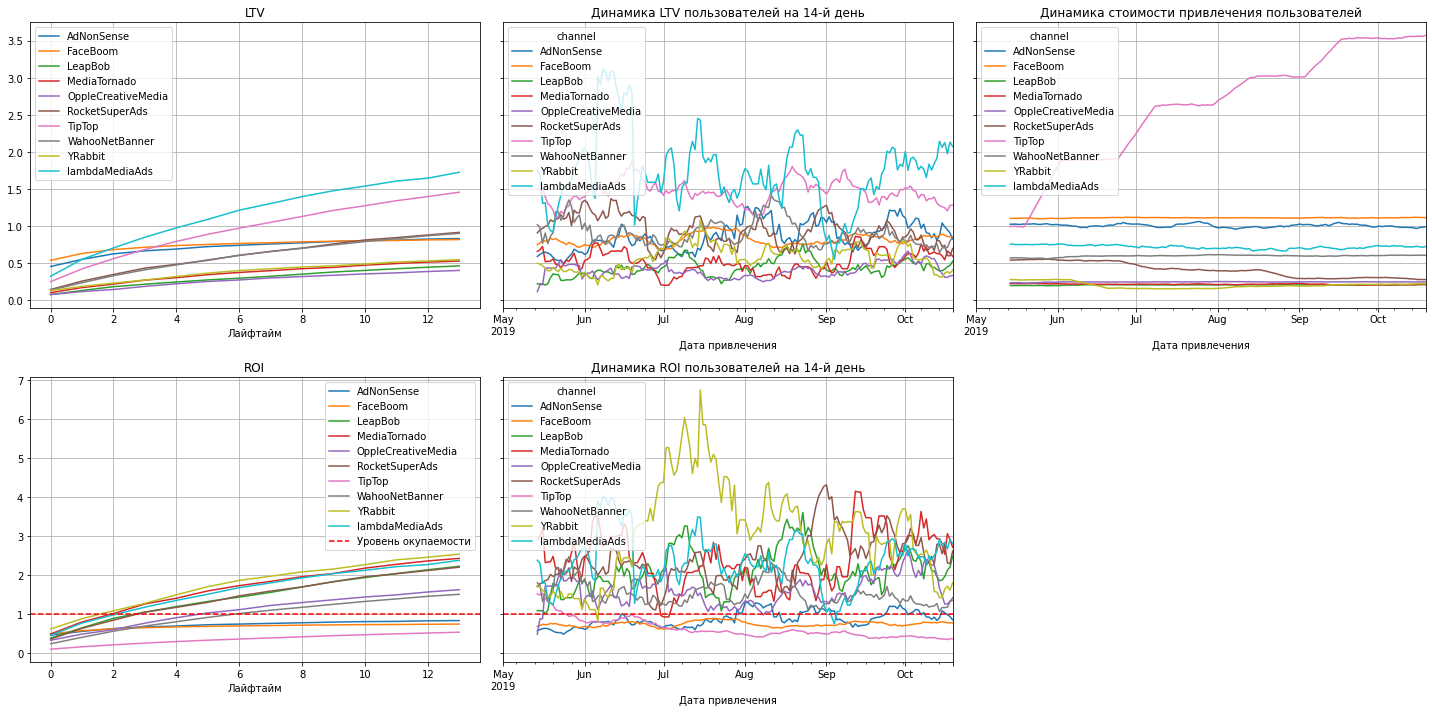

In [55]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

Бросается в глаза резкий рост расходов на привлечение пользователей TipTop, при том что LTV этих пользователей далеко не такой высокий, даже ниже, чем у канала LambdaMediaAds 
ROI у каналов TipTop и Faceboom ниже окупаемости во все периоды

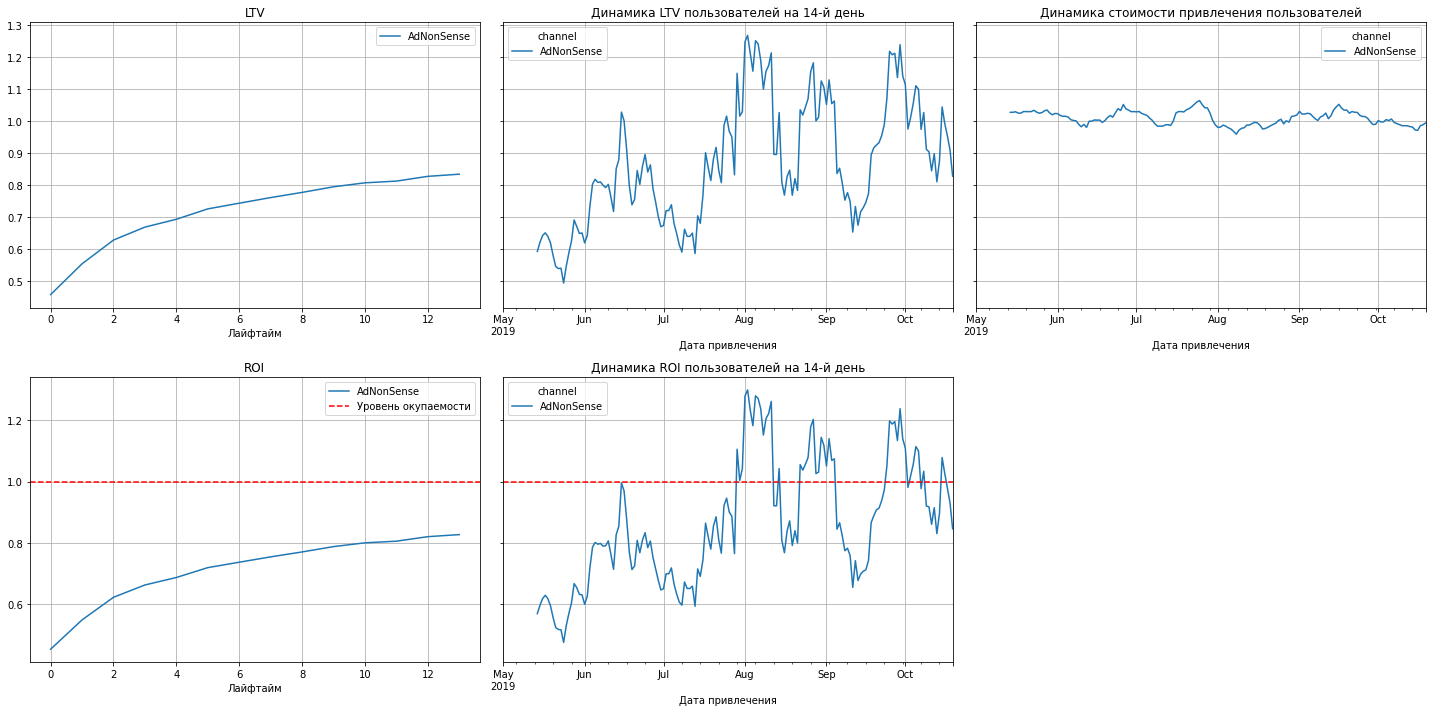

In [56]:
dimensions = ['channel']
roi_raw, ltv, ltv_history, roi, roi_history  = get_ltv(profiles.query('(channel=="AdNonSense")'),orders,datetime(2019, 11, 1).date(), 14, dimensions=dimensions )
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

Как видим, у AdNonSense все тоже очень плохо - на уровень окупаемости он не выходит, хотя затраты на него не росли

##### 4.3 Окупаемость рекламы с разбивкой по странам

In [57]:
dimensions = ['region']
roi_raw, ltv, ltv_history, roi, roi_history  = get_ltv(profiles.query('~(channel=="organic")'),orders,datetime(2019, 11, 1).date(), 14, dimensions=dimensions )

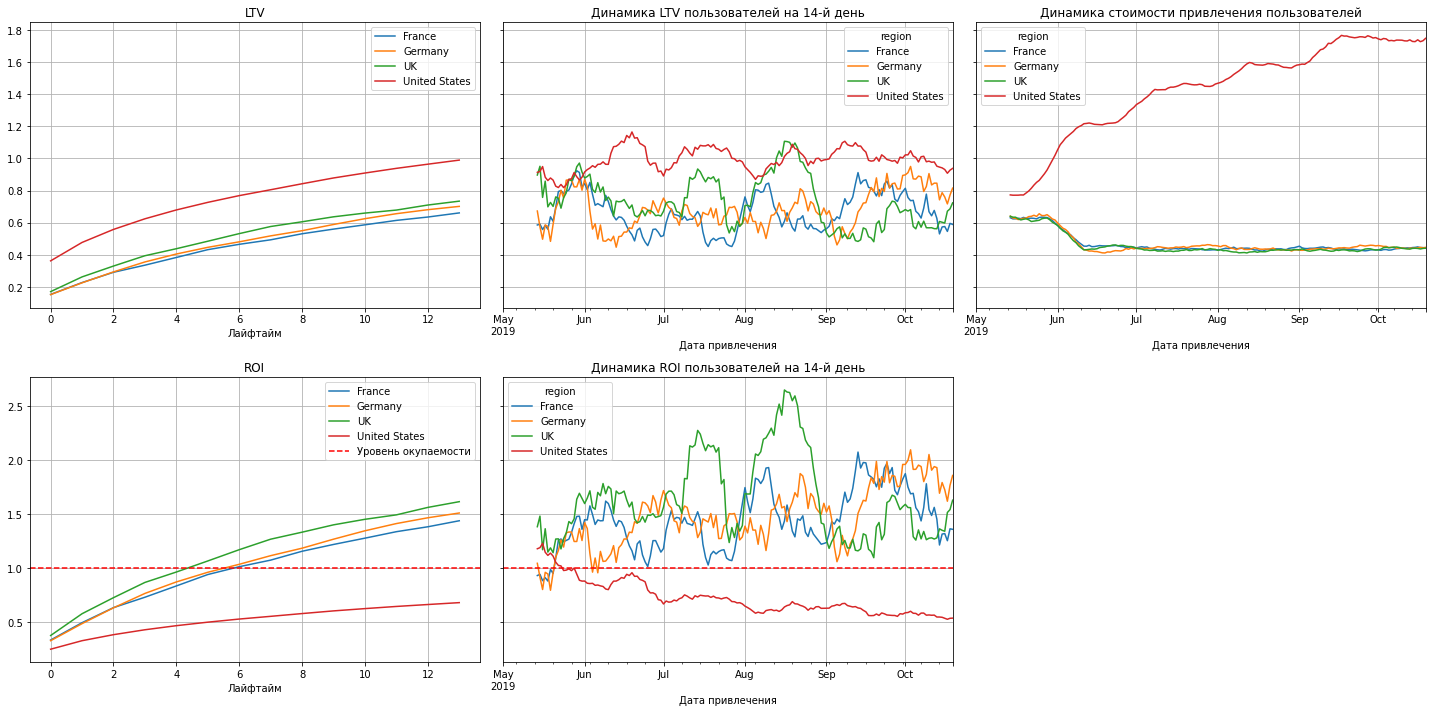

In [58]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

C ROI клиентов из США все очень плохо, и к октябрю становится только хуже

Рассмотрим внимательнее каналы TipTop  и FaceBoom в Америке

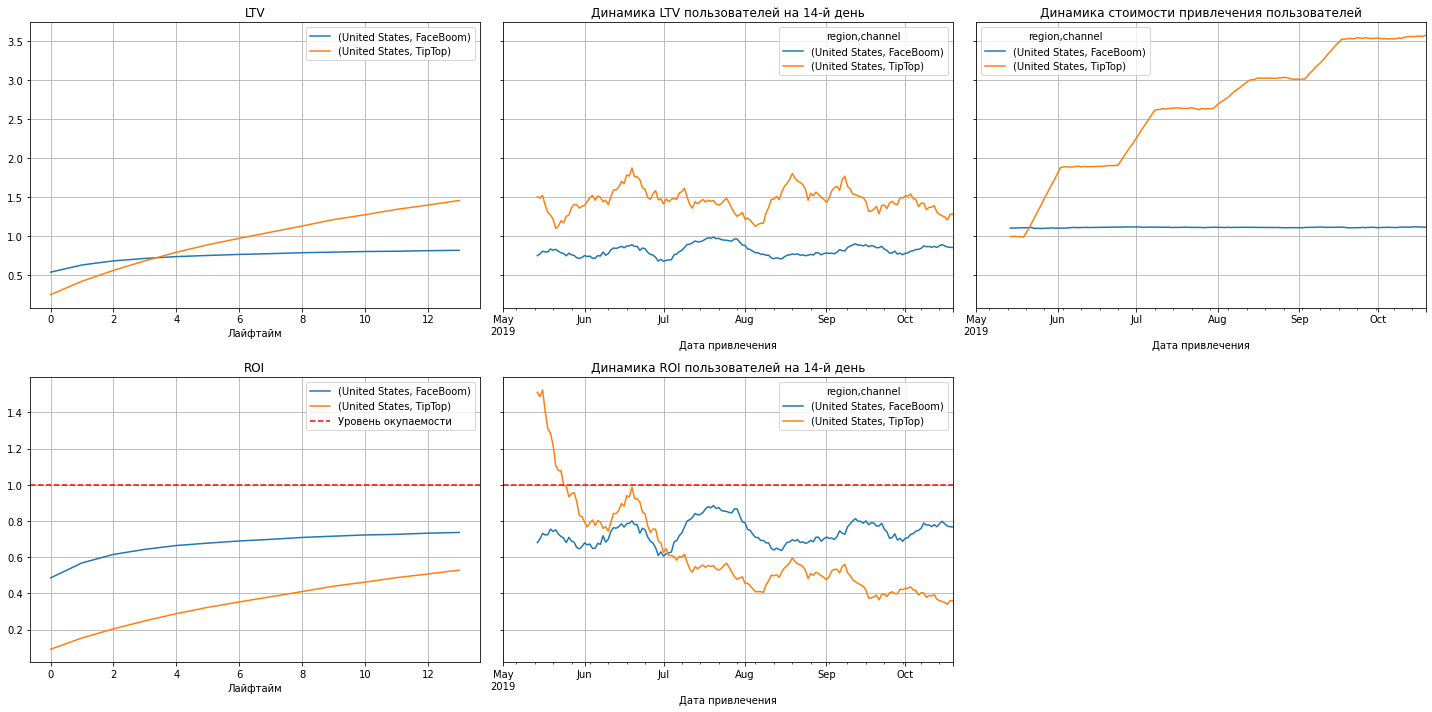

In [46]:
dimensions = ['region','channel']
roi_raw, ltv, ltv_history, roi, roi_history  = get_ltv(profiles.query('(channel == "TipTop" and region == "United States") or (channel == "FaceBoom" and region == "United States")'),orders,datetime(2019, 11, 1).date(), 14, dimensions=dimensions )
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

Вот и проблема: расходы на привлечения пользователей из США резко растут, LTV американских пользователей растет незначительно, а вот ROI пользователей из США начиная с июня ниже уровня окупаемости. Американские покупатели заметно хуже окупаются, чем покупатели других стран, к 14 дню они не выходят на безубытоный уровень. 
А американских пользователей у в нашей компании больше всего.

##### 4.4 Анализ удержания

In [59]:
retention_raw, retention, retention_history = get_retention(profiles.query('~(channel=="organic")'), sessions, datetime(2019, 11, 1).date(), 14)

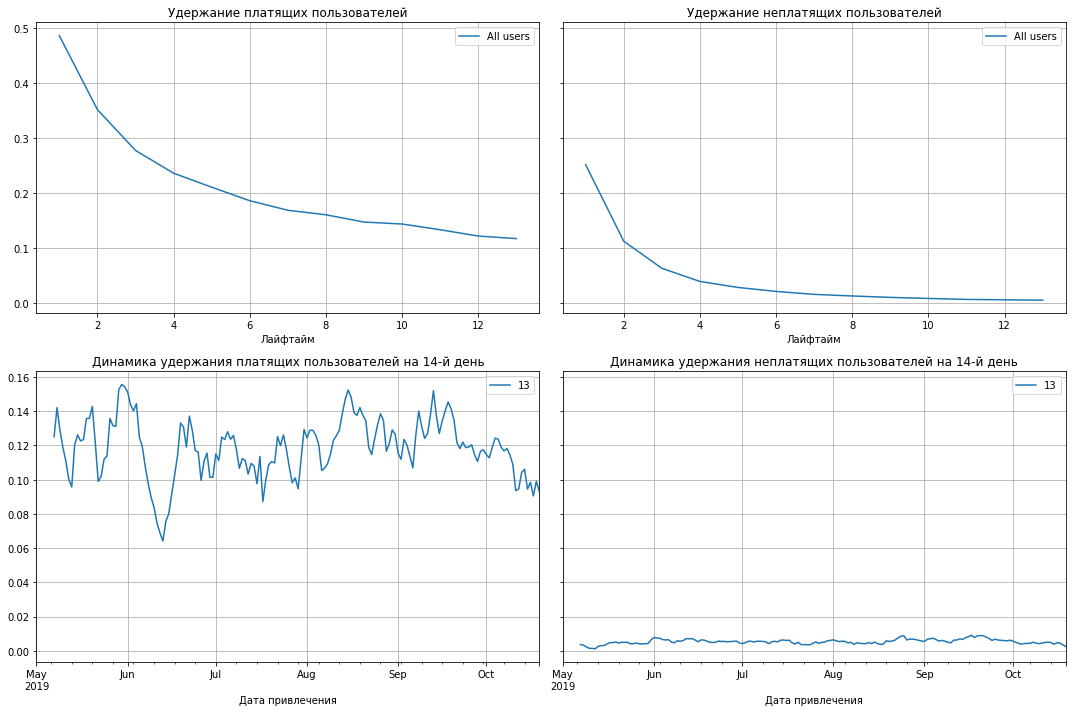

In [60]:
plot_retention(retention, retention_history, 14, window=7)

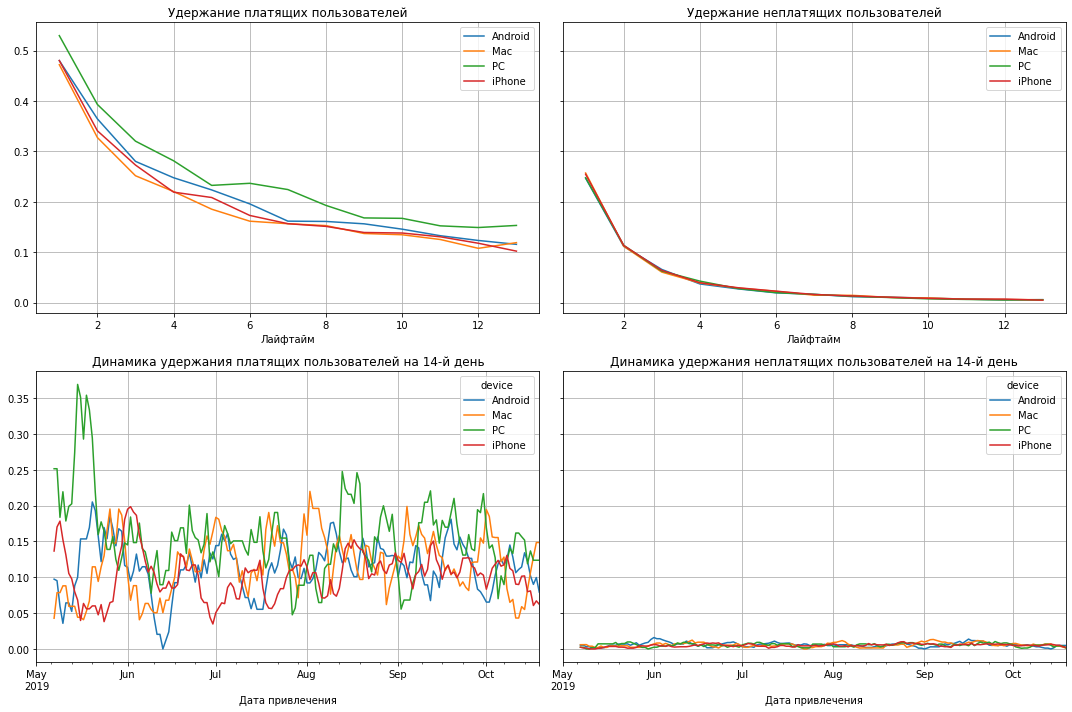

In [61]:
dimensions = ['device']
retention_raw, retention, retention_history = get_retention(profiles.query('~(channel=="organic")'), sessions, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_retention(retention, retention_history, 14, window=7)

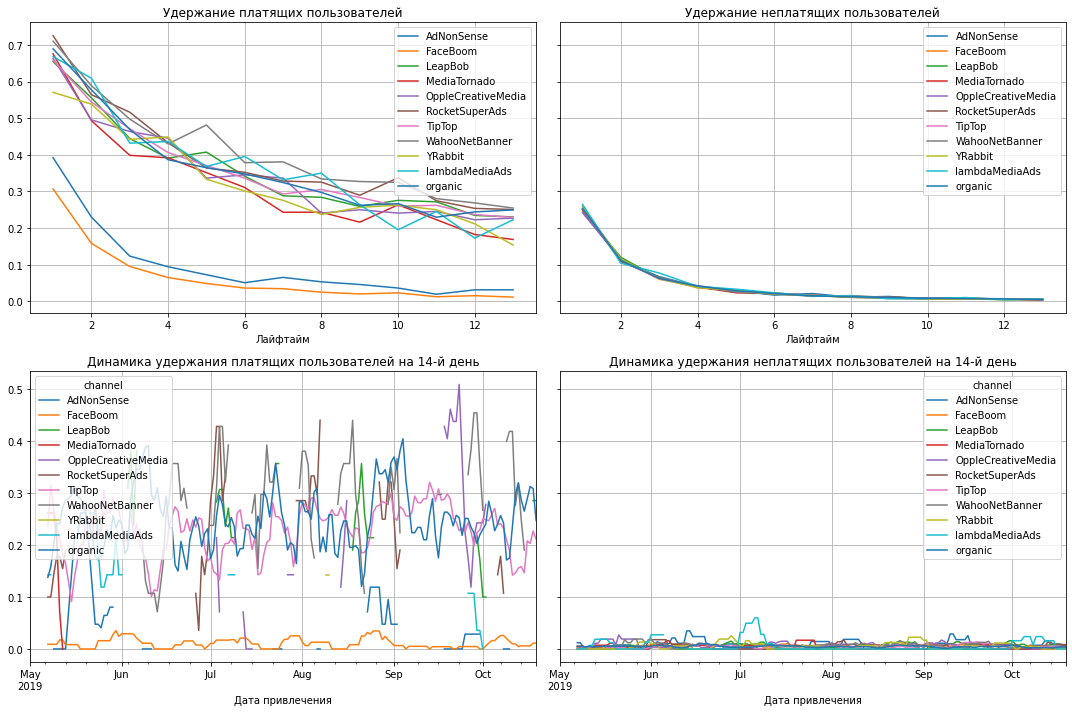

In [50]:
dimensions = ['channel']
retention_raw, retention, retention_history = get_retention(profiles, sessions, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_retention(retention, retention_history, 14, window=7)

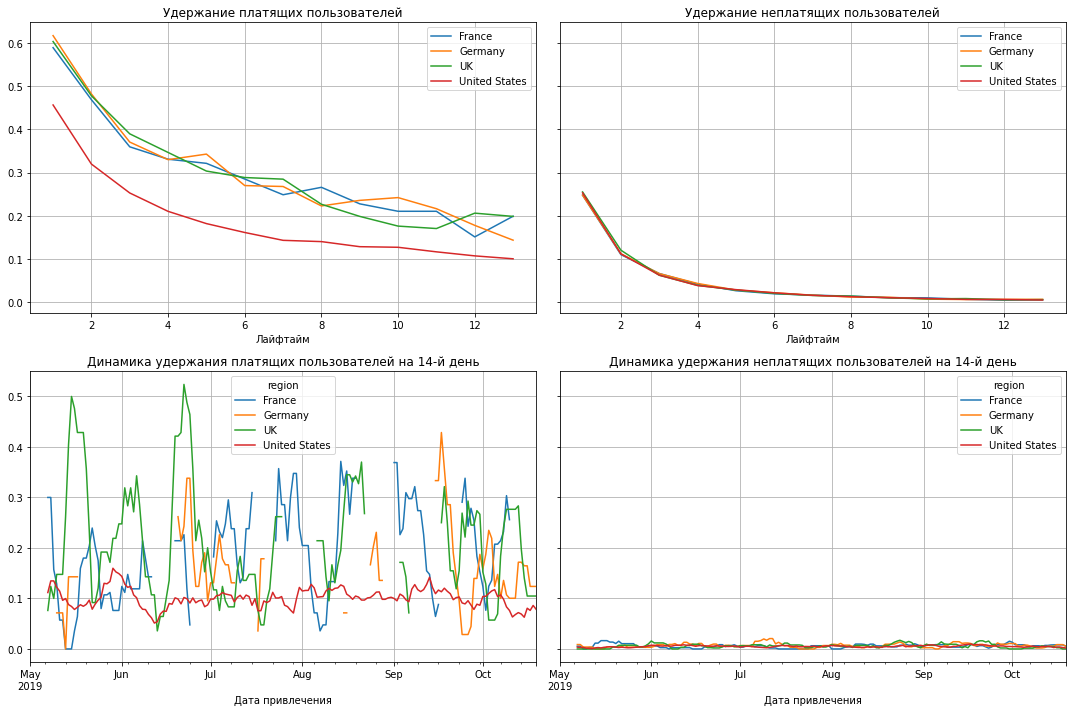

In [62]:
dimensions = ['region']
retention_raw, retention, retention_history = get_retention(profiles.query('~(channel=="organic")'), sessions, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_retention(retention, retention_history, 14, window=7)

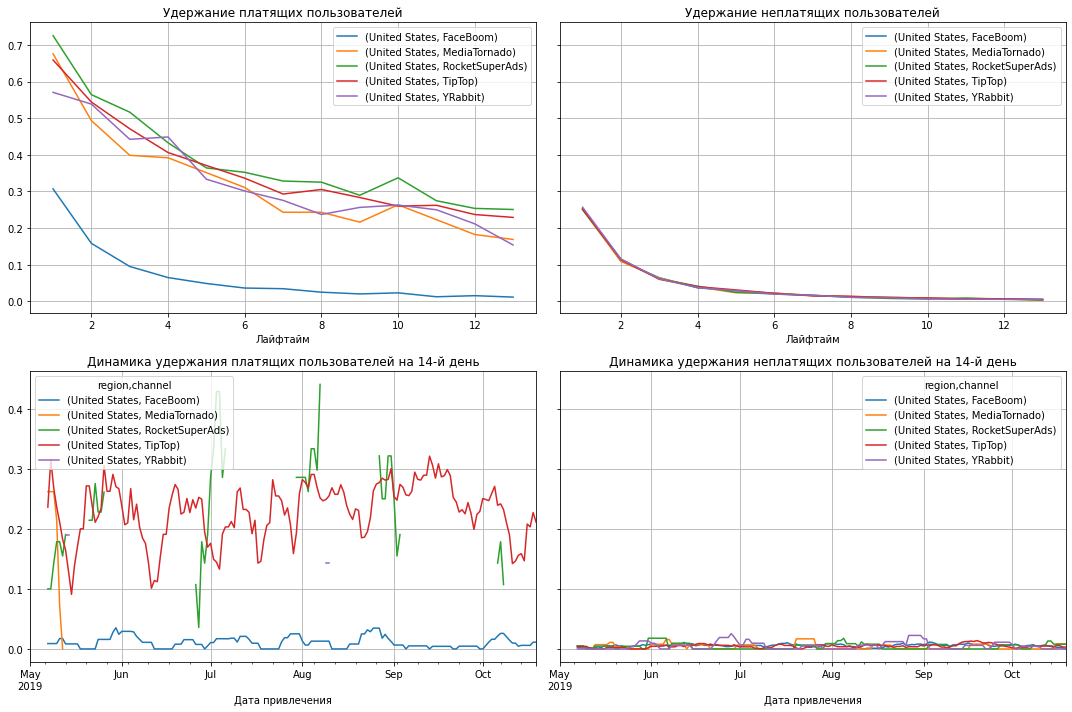

In [65]:
dimensions = ['region','channel']
retention_raw, retention, retention_history = get_retention(profiles.query('region=="United States" and ~(channel=="organic")'), sessions, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_retention(retention, retention_history, 14, window=7)

##### 4.5 Анализ конверсии

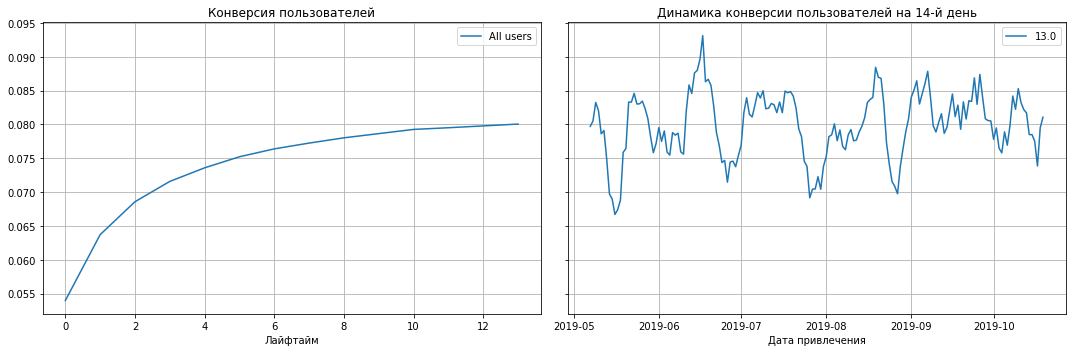

In [66]:
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('~(channel=="organic")'), orders, datetime(2019, 11, 1).date(), 14)
plot_conversion(conversion, conversion_history, 14, window=7)

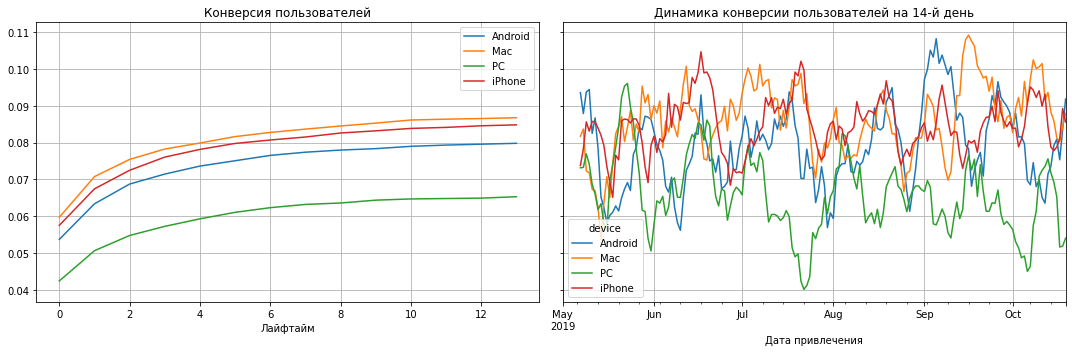

In [67]:
dimensions = ['device']
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('~(channel=="organic")'), orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_conversion(conversion, conversion_history, 14, window=7)

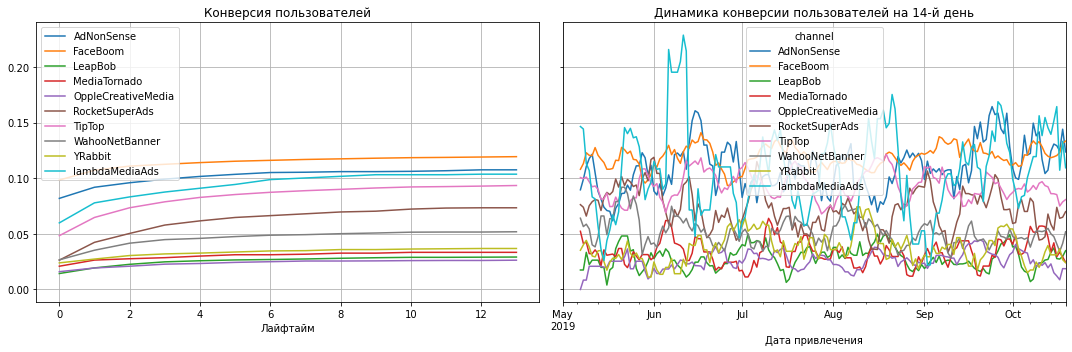

In [68]:
dimensions = ['channel']
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('~(channel=="organic")'), orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_conversion(conversion, conversion_history, 14, window=7)

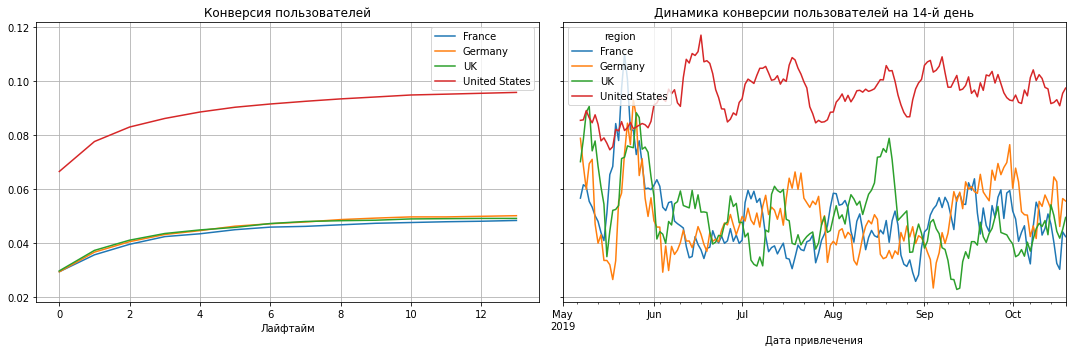

In [69]:
dimensions = ['region']
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('~(channel=="organic")'), orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_conversion(conversion, conversion_history, 14, window=7)

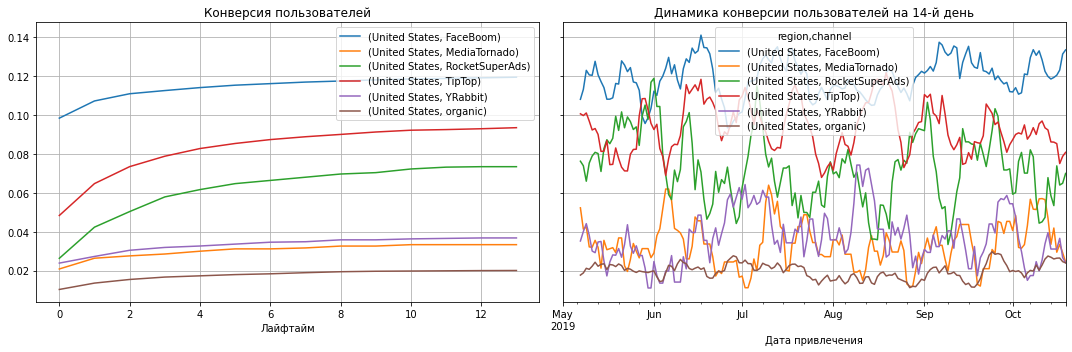

In [72]:
dimensions = ['region','channel']
conversion_raw, conversion, conversion_history = get_conversion(profiles.query('(region=="United States")'), orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions)
plot_conversion(conversion, conversion_history, 14, window=7)

# Выводы
 
* Больше всего платящих пользователей канала Faceboom, почти вдвое меньше TipTop, затраты же на рекламу для привелечения на этих каналах огромны, намного превышают затраты по другим каналам, в то же время конверсия этих каналов не особенно велика, а вот удержание Faceboom - провально, пользователи этого канала удерживаются хуже всех. ROI Faceboom и TipTop стабильно ниже уровня окупаемости. 

* Расходы на привлечения пользователей из США резко растут, LTV американских пользователей растет незначительно, а вот ROI пользователей из США   ниже уровня окупаемости. Американские покупатели заметно хуже окупаются, чем покупатели других стран, к 14 дню они не выходят на безубытоный уровень. А американских пользователей у в нашей компании больше всего. При этом покупатели из Америки лучше всего и стабильно конвертируются, но очень плохо удерживаются

* Проблемы тажке с удержаением канала AdNonSense, он также неплохо конвертируется, но очень плохо удерживается, ROI у него ниже уровня окупаемости


* Особенно плохая ситуация по каналам TipTop и FaceBoom в Америке, каналы не окупаются, ROI очень сильно ниже уровня окупаемости. 
    * Но ситуация с каналами разная - канал FaceBoom очень хорошо конвертируется и очень плохо удерживается, затраты на же на него были стабильны
    * Канал TipTop неплохо конвертируется и удерживается, ROI очень низкий из-за огромных затрат на привлечение

* По устройстам все стабильно, причин для убытков нет, можно лишь отметить, что пользователи PC конвертируются хуже остальных, может быть есть проблемы с платформой

# Рекомендации 
* Самое главное - проанализировать причины плохого удержания пользователей США  и причины плохого удержания пользователей каналов Facebom и AdNonSense -   нет никакого смысле вкладывать огромные средства в пользоватей, которые не удерживаются. 

* Необхомо также проверить причины такого огромного рекламного бюджета на канал TipTop

* Если удасться улучшить удержание пользователей, компания имеет все возможности выйти в плюс